In [58]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [59]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

5


In [60]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "margin", "kmeans", 30, 0.01, 20])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

5


0    d0577a0e956142cd870062059916b34b
1    169dd1bbf3264dc5933c97a623b327c2
2    ad4dd28cbb394d85bd302eed8007dd0b
3    7a08d878aaec4b8c94e27bdf89c4c310
4    82d69244d0ae41d28cf966bc14b97e07
Name: run_id, dtype: object

In [61]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

5


0    46e0e3c52d3e4bd1911ba2746e79d265
1    86cdbac1a89d413ab827426daa88b577
2    84a98cff23b048cf87bc001316584cfe
3    ed2c66f9e675432a8d232ab1ffc88ef0
4    0b758e28c50a4503b7230190b83ed45b
Name: run_id, dtype: object

In [62]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

5


0    1a0a107242d846cf93fe7fa58044c5fa
1    a03ca221668043c79a58c6844eaf13c2
2    c08bfd0f076f4b16835be2be84b619ed
3    1e82eb74b8e64b248372239567f34d27
4    dc72d6e3d5a4436889403f676e8bcec0
Name: run_id, dtype: object

In [63]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

5


0    67affb65690a4ebb80e99aaa1fa5087b
1    d68377684b484600af5f3ac419805411
2    bc8ca604b3b247c4afee737b7c57b718
3    4522d3631cd74ca7a3c862a05c4ddc22
4    0c7c4aa971a647548d2a8810d978b38d
Name: run_id, dtype: object

In [64]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [65]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 20, "margin"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

5


0    71303339bd34442b91a30eb4512fdd7a
1    cf276eb20075433f9597b565bc27e561
2    bb63474b616c4237b03f117358b8238c
3    0c8b968cc2a744ee88067602a3a44dc2
4    2600107a4da643608142c083639f9010
Name: run_id, dtype: object

In [66]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

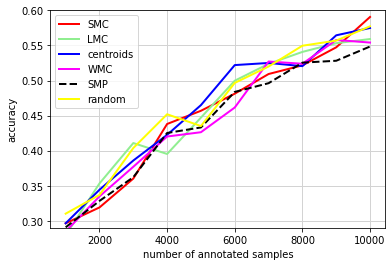

In [67]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

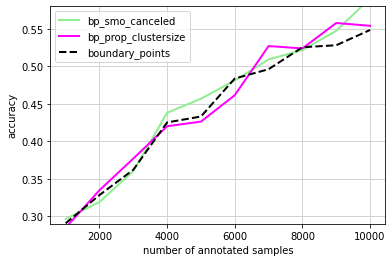

In [68]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [69]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.29642 0.31904 0.36018 0.43802 0.45684 0.48122 0.50924 0.5216  0.5473
 0.59058]
bp_lmo: [0.27948 0.35326 0.41082 0.39526 0.44712 0.4997  0.52376 0.54076 0.55318
 0.55912]


In [70]:
avg_accs_centroids

array([0.29642, 0.34424, 0.3859 , 0.42252, 0.46492, 0.52198, 0.525  ,
       0.52048, 0.56442, 0.5749 ])

In [71]:
avg_accs_boundary

array([0.2907 , 0.32834, 0.3621 , 0.4252 , 0.43308, 0.48374, 0.49616,
       0.52546, 0.52816, 0.54846])

In [72]:
avg_accs_bp_smo

array([0.29642, 0.31904, 0.36018, 0.43802, 0.45684, 0.48122, 0.50924,
       0.5216 , 0.5473 , 0.59058])

In [73]:
avg_accs_bp_lmo

array([0.27948, 0.35326, 0.41082, 0.39526, 0.44712, 0.4997 , 0.52376,
       0.54076, 0.55318, 0.55912])

In [74]:
avg_accs_clusterwise

array([0.2848 , 0.33482, 0.377  , 0.42014, 0.42628, 0.4615 , 0.52706,
       0.52388, 0.55778, 0.5541 ])

In [75]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [76]:
avg_accs_random_uncertain

array([0.3038 , 0.35358, 0.39718, 0.41198, 0.46542, 0.47712, 0.50866,
       0.53472, 0.554  , 0.56656])